
# DIABETES PREDICTIONS 

### 1.Use the “pima-indians-diabetes.csv” dataset and note down the meta information. 

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes(in).csv")

# Show meta information
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Shape: (768, 12)

Column Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10           

### 2.Compute mean & standard deviation, tabulate and visualize the age of the patients. 

=== Age Summary ===
            Statistic        Age
0                Mean  33.240885
1  Standard Deviation  11.760232


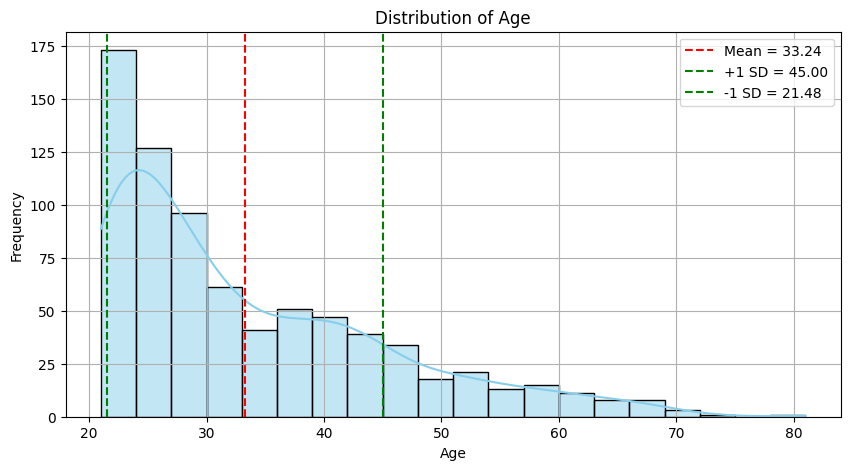

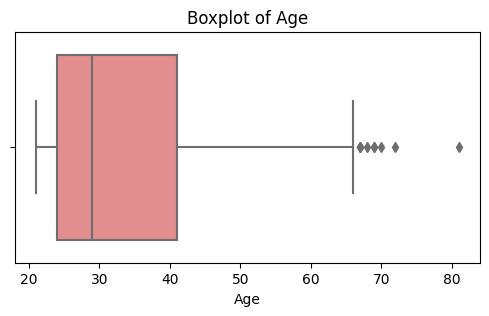

In [8]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes(in).csv")


age_mean = df["Age"].mean()
age_std = df["Age"].std()


summary = pd.DataFrame({
    "Statistic": ["Mean", "Standard Deviation"],
    "Age": [age_mean, age_std]
})
print("=== Age Summary ===")
print(summary)



plt.figure(figsize=(10,5))


sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.axvline(age_mean, color="red", linestyle="--", label=f"Mean = {age_mean:.2f}")
plt.axvline(age_mean + age_std, color="green", linestyle="--", label=f"+1 SD = {age_mean+age_std:.2f}")
plt.axvline(age_mean - age_std, color="green", linestyle="--", label=f"-1 SD = {age_mean-age_std:.2f}")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(x=df["Age"], color="lightcoral")
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()


### 3.Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

=== Age & BMI by Diabetes Outcome ===
               Age                         BMI                
              mean        std count       mean       std count
Outcome                                                       
0        31.190000  11.667655   500  30.304200  7.689855   500
1        37.067164  10.968254   268  35.142537  7.262967   268


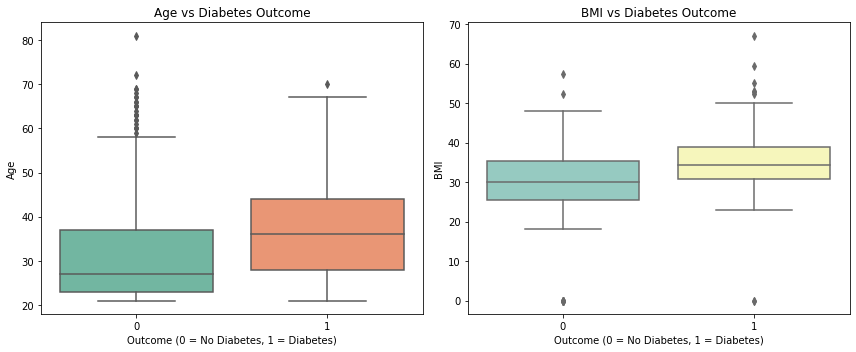

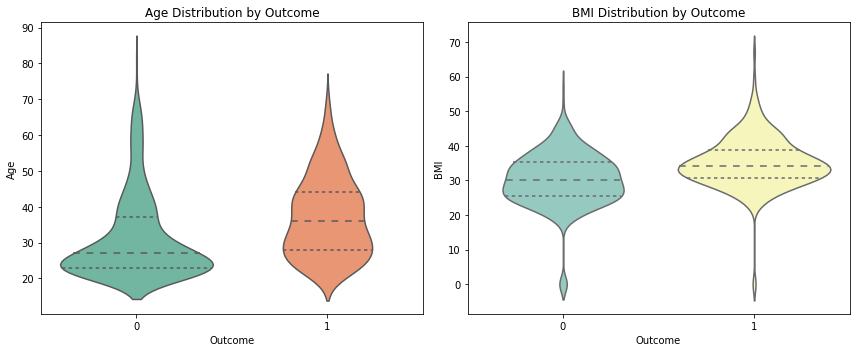

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("diabetes.csv")


summary = df.groupby("Outcome")[["Age", "BMI"]].agg(["mean", "std", "count"])
print("=== Age & BMI by Diabetes Outcome ===")
print(summary)

summary_reset = summary.reset_index()




plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="Outcome", y="Age", data=df, palette="Set2")
plt.title("Age vs Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Age")

plt.subplot(1,2,2)
sns.boxplot(x="Outcome", y="BMI", data=df, palette="Set3")
plt.title("BMI vs Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("BMI")

plt.tight_layout()
plt.show()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.violinplot(x="Outcome", y="Age", data=df, palette="Set2", inner="quartile")
plt.title("Age Distribution by Outcome")

plt.subplot(1,2,2)
sns.violinplot(x="Outcome", y="BMI", data=df, palette="Set3", inner="quartile")
plt.title("BMI Distribution by Outcome")

plt.tight_layout()
plt.show()


### 4.Tabulate the class label and comment on whether the classes are balanced. 

In [ ]:
import pandas as pd


df = pd.read_csv("diabetes.csv")


class_counts = df["Outcome"].value_counts().reset_index()
class_counts.columns = ["Outcome", "Count"]


class_counts["Percentage"] = (class_counts["Count"] / len(df)) * 100

print("=== Class Label Distribution ===")
print(class_counts)


=== Class Label Distribution ===
   Outcome  Count  Percentage
0        0    500   65.104167
1        1    268   34.895833


### 5.Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn

In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


cols = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv("diabetes.csv", usecols=range(9), names=cols, header=0, comment="#")


cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df = df.fillna(df.median(numeric_only=True))


X = df.drop("Outcome", axis=1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


print("=== Logistic Regression Results ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Logistic Regression Results ===
Accuracy: 0.7446

Confusion Matrix:
[[129  21]
 [ 38  43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



### 6.Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map

Confusion Matrix:
 [[129  21]
 [ 38  43]]


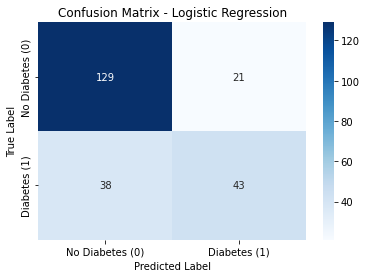

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cols = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv("diabetes.csv", usecols=range(9), names=cols, header=0, comment="#")


cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)
df = df.fillna(df.median(numeric_only=True))

X = df.drop("Outcome", axis=1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes (0)", "Diabetes (1)"],
            yticklabels=["No Diabetes (0)", "Diabetes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### 7.Compute accuracy rate, true positive and true negative rate and comment on the performance. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


cols = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv("diabetes.csv", usecols=range(9), names=cols, header=0, comment="#")


cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)
df = df.fillna(df.median(numeric_only=True))

X = df.drop("Outcome", axis=1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()


accuracy = accuracy_score(y_test, y_pred)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)   
print("=== Model Performance ===")
print(f"Accuracy Rate: {accuracy:.4f}")
print(f"True Positive Rate (Recall/Sensitivity): {tpr:.4f}")
print(f"True Negative Rate (Specificity): {tnr:.4f}")


=== Model Performance ===
Accuracy Rate: 0.7446
True Positive Rate (Recall/Sensitivity): 0.5309
True Negative Rate (Specificity): 0.8600


### 8.Visualize the ROC curve, and comment on the performance of the classifier. 

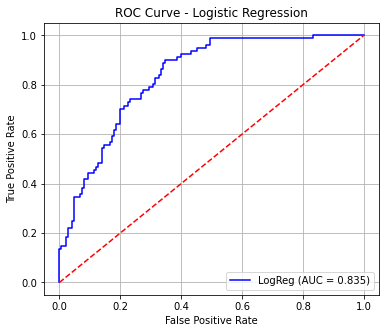

ROC AUC Score: 0.835


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


cols = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv("diabetes.csv", usecols=range(9), names=cols, header=0, comment="#")


cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)
df = df.fillna(df.median(numeric_only=True))


X = df.drop("Outcome", axis=1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


y_prob = logreg.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc_score:.3f})", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="red")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"ROC AUC Score: {auc_score:.3f}")


## EXERCISE 2
### FUELCONSUMPTION

### 1.Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size. 

=== Sample of Selected Features ===
   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244


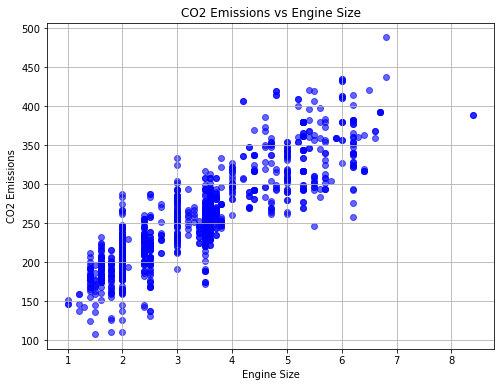

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("FuelConsumption.csv")


cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

print("=== Sample of Selected Features ===")
print(cdf.head())


plt.figure(figsize=(8,6))
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'], color='blue', alpha=0.6)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("CO2 Emissions vs Engine Size")
plt.grid(True)
plt.show()


### 2.split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value. 

=== Model Performance ===
R² Score: 0.875
RMSE: 22.44


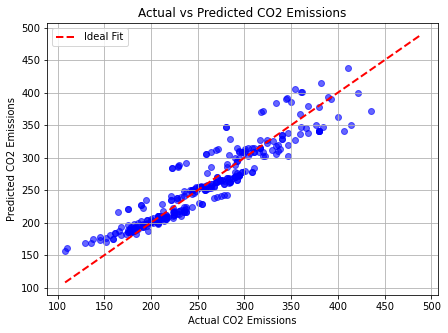

Predicted CO2 Emission: 249.21


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("FuelConsumption.csv")

cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]


X = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = cdf['CO2EMISSIONS']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Model Performance ===")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", linewidth=2, label="Ideal Fit")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.legend()
plt.grid(True)
plt.show()


unknown = pd.DataFrame([[3.5, 6, 10.5]], 
columns=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'])

predicted_emission = model.predict(unknown)
print(f"Predicted CO2 Emission: {predicted_emission[0]:.2f}")



### 3.Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best.


=== Polynomial Degree 3 ===
Mean Absolute Error (MAE): 22.80
Residual Sum of Squares (MSE): 879.27
R² Score: 0.7820


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


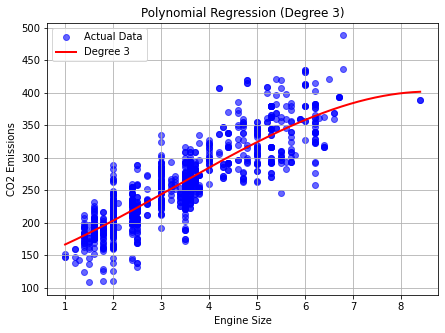


=== Polynomial Degree 4 ===
Mean Absolute Error (MAE): 22.74
Residual Sum of Squares (MSE): 880.96
R² Score: 0.7816


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


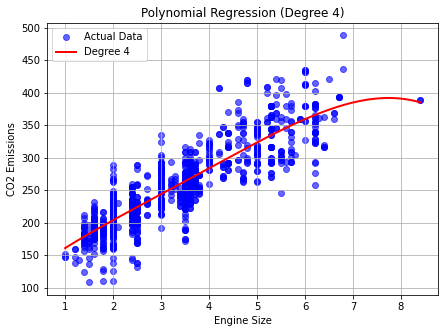


=== Polynomial Degree 5 ===
Mean Absolute Error (MAE): 22.81
Residual Sum of Squares (MSE): 882.04
R² Score: 0.7813


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


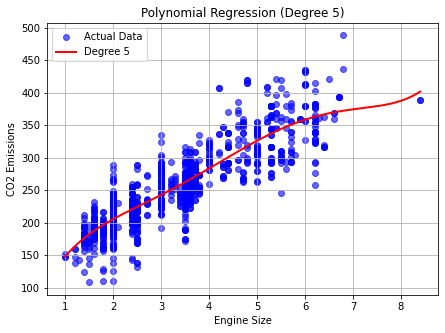


=== Model Comparison ===
Degree 3: MAE=22.80, RSS=879.27, R²=0.7820
Degree 4: MAE=22.74, RSS=880.96, R²=0.7816
Degree 5: MAE=22.81, RSS=882.04, R²=0.7813


In [ ]:
# -------------------------------
# Polynomial Regression on Fuel Consumption Dataset
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Load dataset
df = pd.read_csv("FuelConsumption.csv")

# 2) Select features
cdf = df[['ENGINESIZE', 'CO2EMISSIONS']]

X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4) Function to fit polynomial regression and evaluate
def evaluate_polynomial(degree):
    # Transform features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_pred = model.predict(X_test_poly)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rss = mean_squared_error(y_test, y_pred)   # same as MSE
    r2 = r2_score(y_test, y_pred)

    return mae, rss, r2, model, poly

# 5) Try degrees 3, 4, and 5
results = {}
for d in [3, 4, 5]:
    mae, rss, r2, model, poly = evaluate_polynomial(d)
    results[d] = (mae, rss, r2)
    print(f"\n=== Polynomial Degree {d} ===")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Residual Sum of Squares (MSE): {rss:.2f}")
    print(f"R² Score: {r2:.4f}")

    # Visualization
    X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, color="blue", alpha=0.6, label="Actual Data")
    plt.plot(X_seq, model.predict(poly.transform(X_seq)), color="red", linewidth=2, label=f"Degree {d}")
    plt.xlabel("Engine Size")
    plt.ylabel("CO2 Emissions")
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.legend()
    plt.grid(True)
    plt.show()

# 6) Compare results
print("\n=== Model Comparison ===")
for d, (mae, rss, r2) in results.items():
    print(f"Degree {d}: MAE={mae:.2f}, RSS={rss:.2f}, R²={r2:.4f}")
